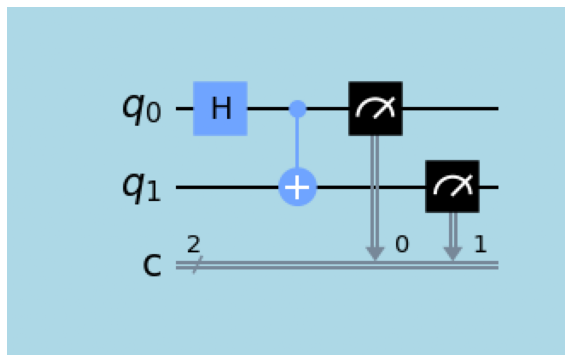

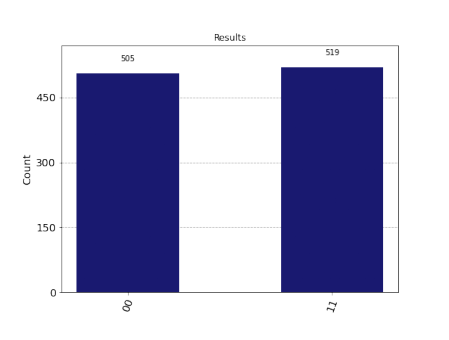

In [12]:
# Importing necessary libraries from Qiskit
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt

# Step 1: Create a Quantum Circuit
# We'll create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Step 2: Apply Quantum Gates
# Applying a Hadamard gate on qubit 0
qc.h(0)
# Applying a CNOT gate with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Step 3: Measure Qubits
# Measuring the qubits and storing the result in classical bits
qc.measure([0,1], [0,1])

# Step 4: Visualize the Circuit
# Displaying the circuit schematic with improved aesthetics
circuit_fig = qc.draw('mpl', style={'backgroundcolor': 'lightblue', 'gatefacecolor': 'white', 'gatetextcolor': 'black', 'fontsize': 18, 'subfontsize': 14})

# Step 5: Simulate the Circuit
# Getting the simulator from Aer
simulator = Aer.get_backend('aer_simulator')
# Transpiling the circuit for the simulator
compiled_circuit = transpile(qc, simulator)
# Running the simulation
result = simulator.run(compiled_circuit).result()
# Getting the counts of the result
counts = result.get_counts()

# Step 6: Visualize the Results
# Displaying the histogram of the result with improved aesthetics
hist_fig = plot_histogram(counts, color='midnightblue', title="Results", bar_labels=True, figsize=(8,6))

# For displaying the circuit diagram:
circuit_fig.savefig('circuit.png')  # This will save the circuit diagram as a PNG file
plt.figure(figsize=(10,10))
img = plt.imread('circuit.png')
plt.imshow(img)
plt.axis('off')  # This will remove the axes for a cleaner look
plt.show()

# For displaying the histogram:
hist_fig.savefig('histogram.png')  # This will save the histogram as a PNG file
plt.figure(figsize=(8,6))
img = plt.imread('histogram.png')
plt.imshow(img)
plt.axis('off')  # This will remove the axes for a cleaner look
plt.show()


Result for θ = 0.00, ϕ = 0.00: {'11': 512, '00': 512}
Result for θ = 0.00, ϕ = 0.13: {'11': 528, '00': 496}
Result for θ = 0.00, ϕ = 0.26: {'11': 508, '00': 516}
Result for θ = 0.00, ϕ = 0.38: {'11': 496, '00': 528}
Result for θ = 0.00, ϕ = 0.51: {'00': 505, '11': 519}
Result for θ = 0.00, ϕ = 0.64: {'11': 535, '00': 489}
Result for θ = 0.00, ϕ = 0.77: {'11': 504, '00': 520}
Result for θ = 0.00, ϕ = 0.90: {'00': 510, '11': 514}
Result for θ = 0.00, ϕ = 1.03: {'00': 536, '11': 488}
Result for θ = 0.00, ϕ = 1.15: {'00': 531, '11': 493}
Result for θ = 0.00, ϕ = 1.28: {'11': 519, '00': 505}
Result for θ = 0.00, ϕ = 1.41: {'11': 496, '00': 528}
Result for θ = 0.00, ϕ = 1.54: {'11': 510, '00': 514}
Result for θ = 0.00, ϕ = 1.67: {'11': 525, '00': 499}
Result for θ = 0.00, ϕ = 1.80: {'11': 507, '00': 517}
Result for θ = 0.00, ϕ = 1.92: {'00': 530, '11': 494}
Result for θ = 0.00, ϕ = 2.05: {'00': 531, '11': 493}
Result for θ = 0.00, ϕ = 2.18: {'11': 534, '00': 490}
Result for θ = 0.00, ϕ = 2.3

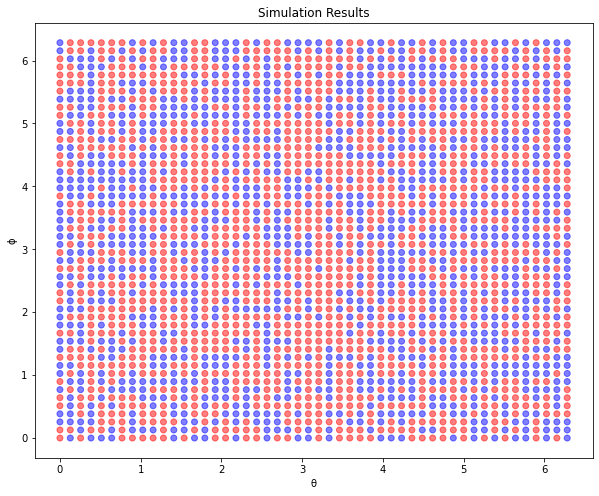

In [22]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

# Create a parameterized quantum circuit with 2 qubits
theta = Parameter('θ')
phi = Parameter('ϕ')
qc = QuantumCircuit(2)
qc.h(0)
qc.rx(theta, 1)
qc.rz(phi, 1)
qc.cx(0, 1)
qc.measure_all()

# Display the circuit
qc.draw('mpl')

# Define a range of parameter values
theta_values = np.linspace(0, 2 * np.pi, 50)
phi_values = np.linspace(0, 2 * np.pi, 50)

# Simulate the circuit for each combination of parameter values
simulator = Aer.get_backend('aer_simulator')
results = []

for theta_val in theta_values:
    for phi_val in phi_values:
        # Set the parameter values
        bound_circuit = qc.bind_parameters({theta: theta_val, phi: phi_val})
        # Transpile the circuit for the simulator
        compiled_circuit = transpile(bound_circuit, simulator)
        # Run the simulation
        result = simulator.run(compiled_circuit).result()
        # Get the counts of the result
        counts = result.get_counts()
        results.append(counts)


x_coords = []
y_coords = []
colors = []

# Loop over the results and parameter values
for i, theta_val in enumerate(theta_values):
    for j, phi_val in enumerate(phi_values):
        # Get the result for this combination of parameter values
        result = results[i * len(phi_values) + j]
        # Print the result
        print(f'Result for θ = {theta_val:.2f}, ϕ = {phi_val:.2f}: {result}')
        # Determine the color based on the result
        if result.get('00', 0) > result.get('11', 0):
            color = 'blue'
        else:
            color = 'red'
        # Append the coordinates and color to the arrays
        x_coords.append(theta_val)
        y_coords.append(phi_val)
        colors.append(color)

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords, c=colors, alpha=0.5)
plt.xlabel('θ')
plt.ylabel('ϕ')
plt.title('Simulation Results')
plt.show()

import json

# Assume 'results' is a list containing your data
data = {
    'theta_values': x_coords,
    'phi_values': y_coords,
    'results': results,
    'colors': colors  # Include the colors in the data
}

# Save the data to a JSON file
with open('data.json', 'w') as f:
    json.dump(data, f)



/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


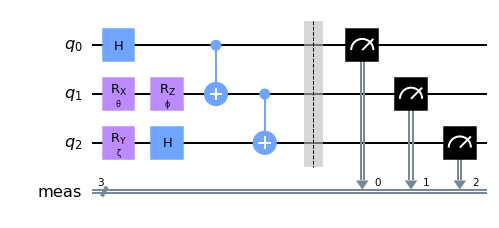

In [6]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram
from mpl_toolkits.mplot3d import Axes3D  # This import registers the 3D projection
import matplotlib.pyplot as plt
import numpy as np

# Create a parameterized quantum circuit with 3 qubits
theta = Parameter('θ')
phi = Parameter('ϕ')
zeta = Parameter('ζ')
qc = QuantumCircuit(3)
qc.h(0)
qc.rx(theta, 1)
qc.rz(phi, 1)
qc.ry(zeta, 2)
qc.h(2)
qc.cx(0, 1)
qc.cx(1, 2)
qc.measure_all()

# Display the circuit
qc.draw('mpl')


/var/folders/d1/bzn2sb0n0cqdk4hd51fyhb6r0000gn/T/ipykernel_33745/1043306347.py:14: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.bind_parameters()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use assign_parameters() instead
  bound_circuit = qc.bind_parameters({theta: theta_val, phi: phi_val, zeta: zeta_val})


Result for θ = 0.00, ϕ = 0.00, ζ = 0.00: {'111': 263, '100': 253, '000': 258, '011': 250}
Result for θ = 0.00, ϕ = 0.00, ζ = 0.90: {'100': 44, '000': 446, '011': 66, '111': 468}
Result for θ = 0.00, ϕ = 0.00, ζ = 1.80: {'100': 4, '011': 3, '000': 534, '111': 483}
Result for θ = 0.00, ϕ = 0.00, ζ = 2.69: {'100': 161, '000': 362, '011': 151, '111': 350}
Result for θ = 0.00, ϕ = 0.00, ζ = 3.59: {'111': 147, '000': 152, '011': 350, '100': 375}
Result for θ = 0.00, ϕ = 0.00, ζ = 4.49: {'111': 6, '100': 505, '000': 7, '011': 506}
Result for θ = 0.00, ϕ = 0.00, ζ = 5.39: {'000': 59, '011': 446, '100': 460, '111': 59}
Result for θ = 0.00, ϕ = 0.00, ζ = 6.28: {'111': 225, '011': 268, '000': 289, '100': 242}
Result for θ = 0.00, ϕ = 0.90, ζ = 0.00: {'100': 257, '111': 254, '000': 269, '011': 244}
Result for θ = 0.00, ϕ = 0.90, ζ = 0.90: {'100': 48, '011': 61, '000': 449, '111': 466}
Result for θ = 0.00, ϕ = 0.90, ζ = 1.80: {'100': 2, '011': 5, '000': 501, '111': 516}
Result for θ = 0.00, ϕ = 0.9

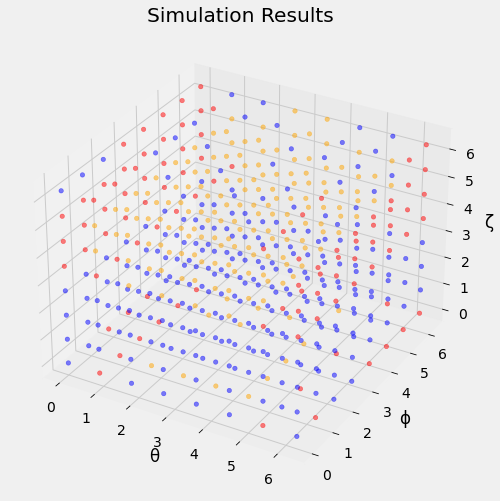

In [15]:
# Define a range of parameter values
theta_values = np.linspace(0, 2 * np.pi, 8)
phi_values = np.linspace(0, 2 * np.pi, 8)
zeta_values = np.linspace(0, 2 * np.pi, 8)

# Simulate the circuit for each combination of parameter values
simulator = Aer.get_backend('aer_simulator')
results = []

for theta_val in theta_values:
    for phi_val in phi_values:
        for zeta_val in zeta_values:
            # Set the parameter values
            bound_circuit = qc.bind_parameters({theta: theta_val, phi: phi_val, zeta: zeta_val})
            # Transpile the circuit for the simulator
            compiled_circuit = transpile(bound_circuit, simulator)
            # Run the simulation
            result = simulator.run(compiled_circuit).result()
            # Get the counts of the result
            counts = result.get_counts()
            results.append((theta_val, phi_val, zeta_val, counts))

x_coords = []
y_coords = []
z_coords = []
colors = []

for theta_val, phi_val, zeta_val, result in results:
    # Print the result
    print(f'Result for θ = {theta_val:.2f}, ϕ = {phi_val:.2f}, ζ = {zeta_val:.2f}: {result}')
    # Determine the color based on the result
    color = 'red'  # Default color
    if result.get('000', 0) > result.get('100', 0):
        color = 'blue'
    elif result.get('101', 0) > result.get('000', 0):
        color = 'orange'
    # Append the coordinates and color to the arrays
    x_coords.append(theta_val)
    y_coords.append(phi_val)
    z_coords.append(zeta_val)
    colors.append(color)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_coords, y_coords, z_coords, c=colors, alpha=0.5)
ax.set_xlabel('θ')
ax.set_ylabel('ϕ')
ax.set_zlabel('ζ')
plt.title('Simulation Results')
plt.show()

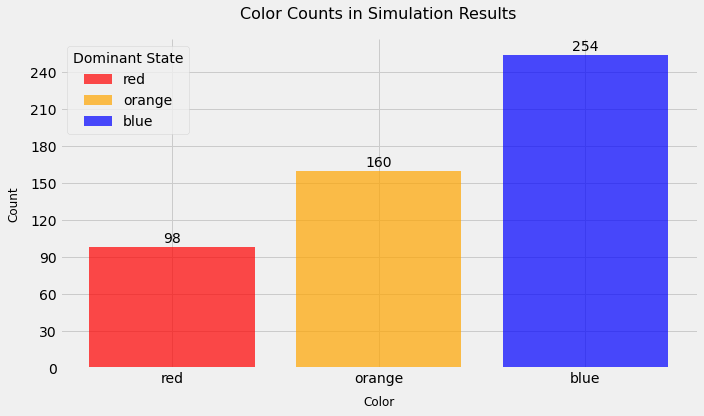

In [16]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import Counter

# Use a fancy style
plt.style.use('fivethirtyeight')

# Count the occurrences of each color
color_counts = Counter(colors)

# Extract colors and their counts for plotting
colors_for_plot = ['red', 'orange', 'blue']
counts_for_plot = [color_counts[color] for color in colors_for_plot]

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(colors_for_plot, counts_for_plot, color=colors_for_plot, alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 1), ha='center', va='bottom', color='black')

# Set labels, title, and legend
ax.set_xlabel('Color', fontsize=12, labelpad=10)
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.set_title('Color Counts in Simulation Results', fontsize=16, pad=20)
ax.legend(bars, colors_for_plot, title='Dominant State')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Use integer y-axis labels
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()
